In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import display

In [2]:
raports_dir = "../../raport"
results_dir = "../results"

In [41]:
def make_plot(results):

    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    fig, axs = plt.subplots(len(sizes), 1, figsize=(10, 12))

    fig.suptitle(
        results[0][2],
        x=0.45,
        y=0.95,
        horizontalalignment="left",
        verticalalignment="top",
        fontsize=15,
    )

    for i in range(len(sizes)):

        relevant_results = [result for result in results if result[3] == sizes[i]]

        axs[i].set_title(f"size {sizes[i]}")

        legend = []

        for result in relevant_results:
            populations = np.array(result[0]["population"])
            average = populations.mean(axis=-1)
            std = populations.std(axis=-1)
            xs = np.arange(0, len(average), step=1)
            axs[i].errorbar(
                xs,
                average[xs],
                yerr=2*std[xs],
                errorevery=5,
                # linestyle="-", # "dotted"
                # linewidth=1.5,
                # elinewidth=2,
                # capsize=1,
            )
            legend.append(result[1])

        axs[i].legend(legend, loc=1)
        axs[i].set_yscale("log")

    axs[i].set(xlabel="iterations")

    fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

    fig.savefig(f"{raports_dir}/{results[0][2]}.pdf", bbox_inches="tight")


## Plotting results

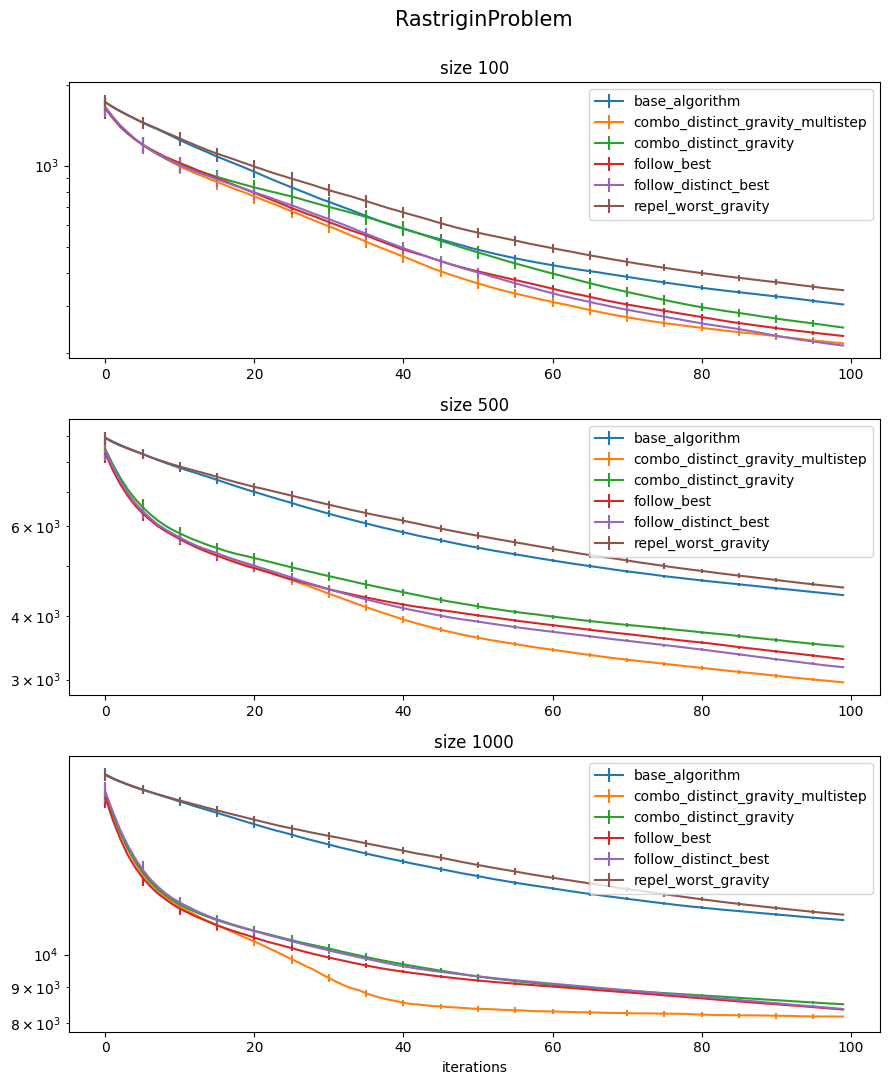

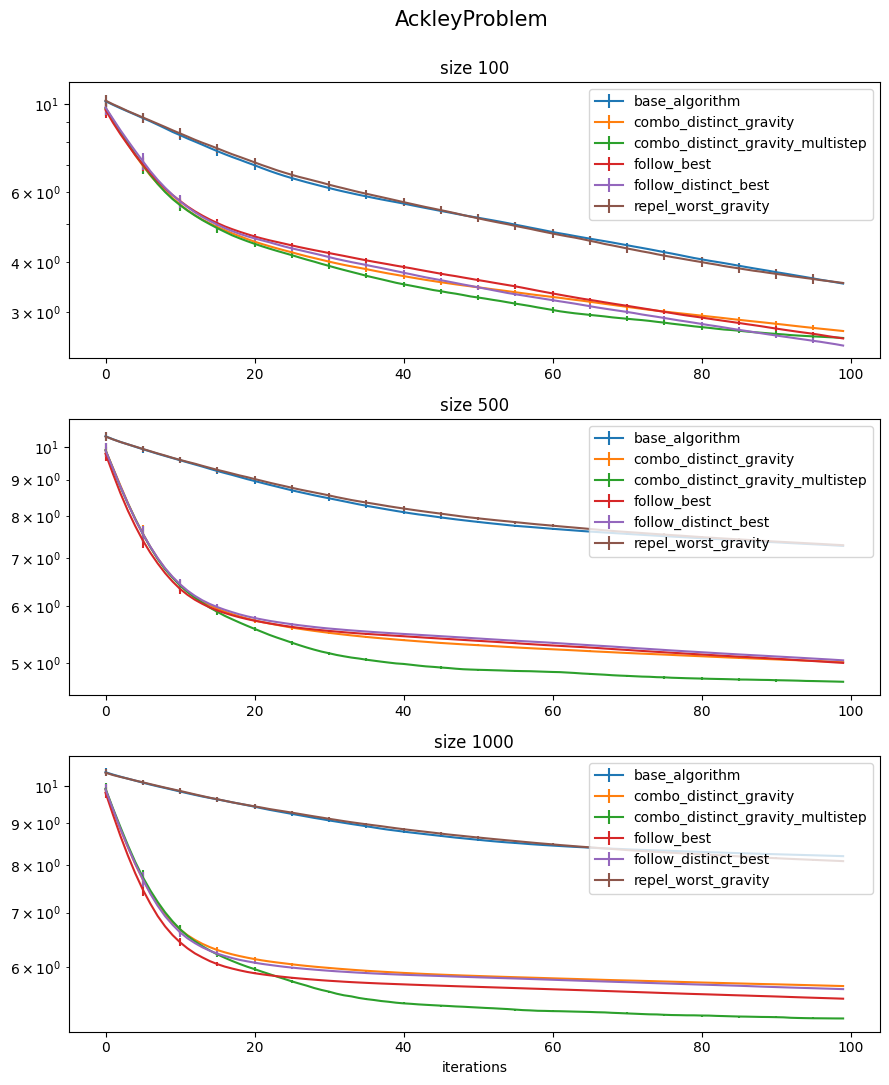

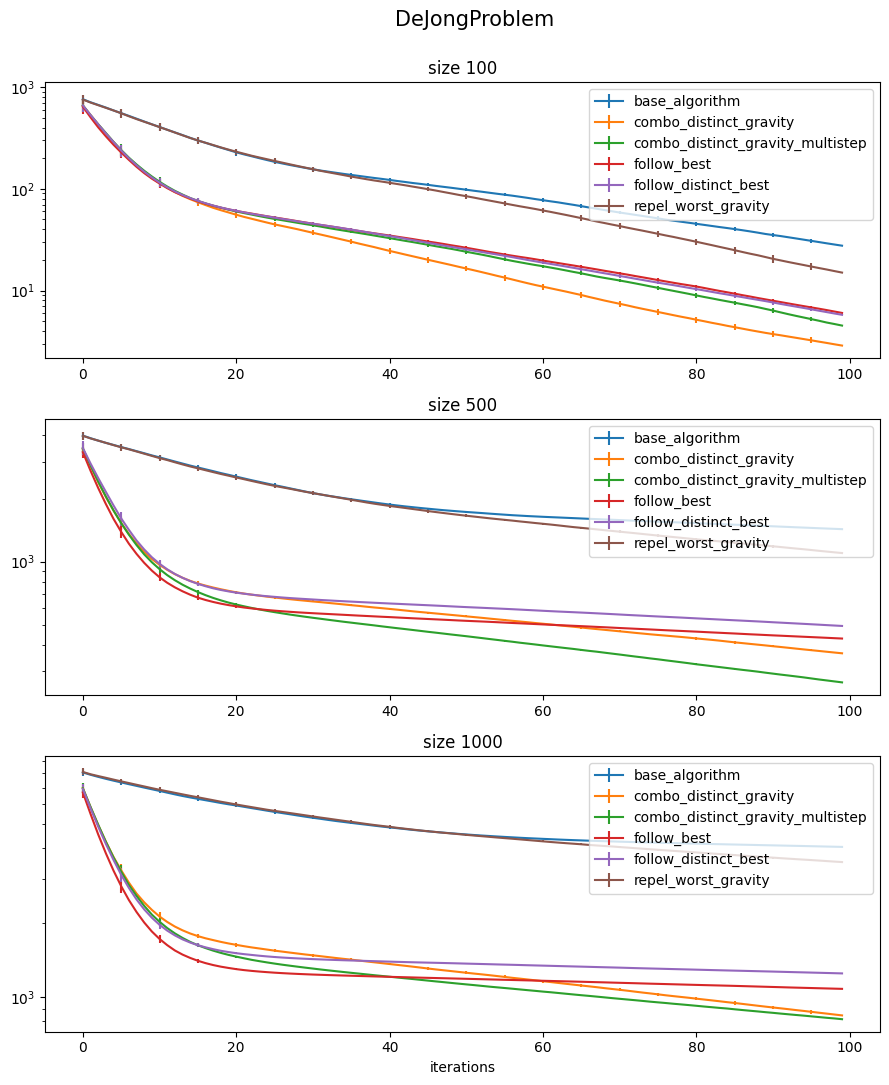

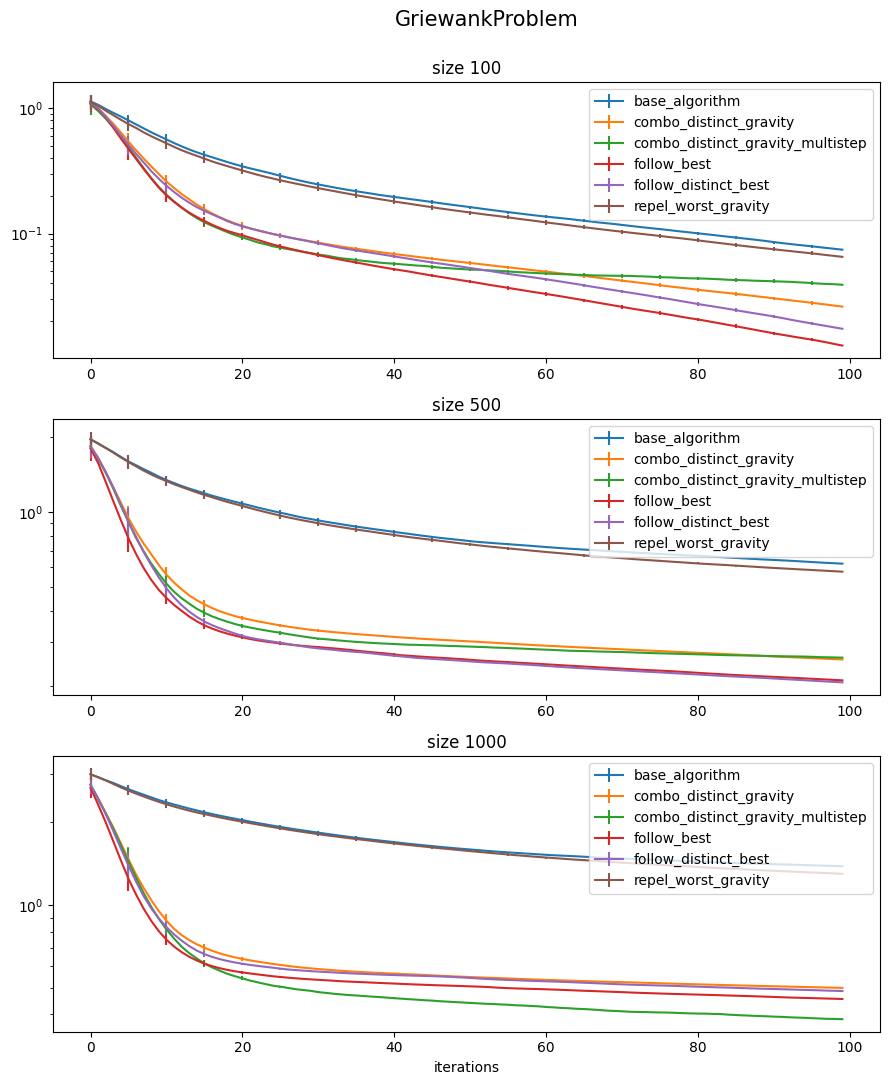

In [42]:
result_files = os.listdir(results_dir)

results = []

for filename in result_files:
    if os.path.isfile(f'{results_dir}/{filename}') and filename.endswith(".json"):
        with open(f'{results_dir}/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

# Comparing results

In [2]:
def compare_solutions(results):
    
    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    
    df = {}
    
    for i in range(len(sizes)):
       
        relevant_results = [result for result in results if result[3] == sizes[i]]

        df_size = {}
        for result in relevant_results:
            final_population = np.array(result[0]["population"])[-1,:]
            df_size[result[1]] = {
                "mean": final_population.mean(),
                "std": final_population.std()
            }
        
        df[sizes[i]] = df_size
        
    return df

In [3]:
result_files = os.listdir(results_dir)

results = []

for filename in result_files:
    if os.path.isfile(f'{results_dir}/{filename}') and filename.endswith(".json"):
        with open(f'{results_dir}/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))

df = {}

for problem in problems:
    df_problem = compare_solutions([result for result in results if result[2] == problem])
    df[problem] = df_problem

In [4]:
df_unpacked = {
    (problem_name, problem_size): {
        (" ".join([part.capitalize() for part in alg_name.split("_")]), metric): np.round(value, 5)
        for alg_name, alg_df in problem_size_df.items()
        for metric, value in alg_df.items()
    }
    for problem_name, problem_name_df in df.items()
    for problem_size, problem_size_df in problem_name_df.items()
}

results_df = pd.DataFrame.from_dict(df_unpacked).T
results_df

Base Algorithm            \
                                mean       std   
RastriginProblem 100       304.51769   2.77903   
                 500      4393.43021  13.03737   
                 1000    11196.29460  16.41847   
AckleyProblem    100         3.53167   0.02593   
                 500         7.27954   0.00761   
                 1000        8.20581   0.00384   
GriewankProblem  100         0.07439   0.00089   
                 500         0.62049   0.00171   
                 1000        1.38256   0.00179   
DeJongProblem    100        27.62355   0.64375   
                 500      1429.38594   3.82378   
                 1000     4042.96371   4.97741   

                      Combo Distinct Gravity Multistep            \
                                                  mean       std   
RastriginProblem 100                         218.12638   2.66676   
                 500                        2962.91302  12.46331   
                 1000                       8170.41974  34.81629   
AckleyProblem    100                           2.57707   0.01884   
                 500                           4.71073   0.01020   
                 1000                          5.19312   0.00665   
GriewankProblem  100                           0.03901   0.00079   
                 500                           0.26076   0.00081   
                 1000                          0.38444   0.00124   
DeJongProblem    100                           4.53433   0.11609   
                 500                         265.56180   1.20113   
                 1000                        817.32358   1.60453   

                      Combo Distinct Gravity           Follow Best            \
                                        mean       std        mean       std   
RastriginProblem 100               249.85269   3.74841   232.33315   1.99293   
                 500              3483.47729  12.55959  3291.03548  11.54436   
                 1000             8506.35601  14.13806  8359.50666  12.82683   
AckleyProblem    100                 2.68302   0.01918     2.57006   0.01698   
                 500                 5.01727   0.00580     5.00386   0.00542   
                 1000                5.68989   0.00339     5.49080   0.00277   
GriewankProblem  100                 0.02612   0.00047     0.01277   0.00023   
                 500                 0.25636   0.00068     0.21145   0.00054   
                 1000                0.49950   0.00069     0.45524   0.00050   
DeJongProblem    100                 2.88520   0.09299     6.03417   0.13666   
                 500               365.51663   2.27051   429.82363   1.14799   
                 1000              846.56099   6.75333  1083.01397   1.41994   

                      Follow Distinct Best           Repel Worst Gravity  \
                                      mean       std                mean   
RastriginProblem 100             214.08295   1.95822           344.06245   
                 500            3173.59285   9.72218          4547.86455   
                 1000           8376.61995  13.10290         11397.30359   
AckleyProblem    100               2.46627   0.02091             3.54405   
                 500               5.04541   0.00571             7.29609   
                 1000              5.64107   0.00263             8.09147   
GriewankProblem  100               0.01739   0.00027             0.06519   
                 500               0.20753   0.00051             0.57617   
                 1000              0.48655   0.00057             1.29752   
DeJongProblem    100               5.78407   0.12117            15.03103   
                 500             493.61216   1.37780          1099.45868   
                 1000           1249.99524   1.65218          3512.34328   

                                 
                            std  
RastriginProblem 100    4.20315  
                 500   19.18121  
                 1000  29.42056  
AckleyProble

In [5]:
results_df.to_csv(f"{raports_dir}/results_table_1.csv")

In [24]:
import re

def split_alg_name(alg_name: str) -> str:
    return " ".join([part.capitalize() for part in alg_name.split("_")])

def parse_problem_name(problem_name: str) -> str:
    return " ".join(re.findall("[A-Z][^A-Z]*", problem_name)[:-1])

df_unpacked = [
    (parse_problem_name(problem_name), split_alg_name(alg_name), problem_size, metric, np.round(value, 5))
    for problem_name, problem_name_df in df.items()
    for problem_size, problem_size_df in problem_name_df.items()
    for alg_name, alg_df in problem_size_df.items()
    for metric, value in alg_df.items()
]

In [25]:
results_df = {}

for record in df_unpacked:
    problem_name, alg_name, problem_size, metric, value = record
    if (problem_name, alg_name) not in results_df.keys():
        results_df[(problem_name, alg_name)] = {}
    results_df[(problem_name, alg_name)][(problem_size, metric)] = value

results_df = pd.DataFrame.from_dict(results_df).T
results_df = results_df.sort_index()
results_df

100                  500   \
                                                 mean      std        mean   
Ackley    Base Algorithm                      3.53167  0.02593     7.27954   
          Combo Distinct Gravity              2.68302  0.01918     5.01727   
          Combo Distinct Gravity Multistep    2.57707  0.01884     4.71073   
          Follow Best                         2.57006  0.01698     5.00386   
          Follow Distinct Best                2.46627  0.02091     5.04541   
          Repel Worst Gravity                 3.54405  0.04870     7.29609   
De Jong   Base Algorithm                     27.62355  0.64375  1429.38594   
          Combo Distinct Gravity              2.88520  0.09299   365.51663   
          Combo Distinct Gravity Multistep    4.53433  0.11609   265.56180   
          Follow Best                         6.03417  0.13666   429.82363   
          Follow Distinct Best                5.78407  0.12117   493.61216   
          Repel Worst Gravity                15.03103  0.59416  1099.45868   
Griewank  Base Algorithm                      0.07439  0.00089     0.62049   
          Combo Distinct Gravity              0.02612  0.00047     0.25636   
          Combo Distinct Gravity Multistep    0.03901  0.00079     0.26076   
          Follow Best                         0.01277  0.00023     0.21145   
          Follow Distinct Best                0.01739  0.00027     0.20753   
          Repel Worst Gravity                 0.06519  0.00126     0.57617   
Rastrigin Base Algorithm                    304.51769  2.77903  4393.43021   
          Combo Distinct Gravity            249.85269  3.74841  3483.47729   
          Combo Distinct Gravity Multistep  218.12638  2.66676  2962.91302   
          Follow Best                       232.33315  1.99293  3291.03548   
          Follow Distinct Best              214.08295  1.95822  3173.59285   
          Repel Worst Gravity               344.06245  4.20315  4547.86455   

                                                             1000            
                                                 std         mean       std  
Ackley    Base Algorithm                     0.00761      8.20581   0.00384  
          Combo Distinct Gravity             0.00580      5.68989   0.00339  
          Combo Distinct Gravity Multistep   0.01020      5.19312   0.00665  
          Follow Best                        0.00542      5.49080   0.00277  
          Follow Distinct Best               0.00571      5.64107   0.00263  
          Repel Worst Gravity                0.00974      8.09147   0.00781  
De Jong   Base Algorithm                     3.82378   4042.96371   4.97741  
          Combo Distinct Gravity             2.27051    846.56099   6.75333  
          Combo Distinct Gravity Multistep   1.20113    817.32358   1.60453  
          Follow Best                        1.14799   1083.01397   1.41994  
          Follow Distinct Best               1.37780   1249.99524   1.65218  
          Repel Worst Gravity                7.45729   3512.34328  13.24333  
Griewank  Base Algorithm                     0.00171      1.38256   0.00179  
          Combo Distinct Gravity             0.00068      0.49950   0.00069  
          Combo Distinct Gravity Multistep   0.00081      0.38444   0.00124  
          Follow Best                        0.00054      0.45524   0.00050  
          Follow Distinct Best               0.00051      0.48655   0.00057  
          Repel Worst Gravity                0.00222      1.29752   0.00374  
Rastrigin Base Algorithm                    13.03737  11196.29460  16.41847  
          Combo Distinct Gravity            12.55959   8506.35601  14.13806  
          Combo Distinct Gravity Multistep  12.46331   8170.41974  34.81629  
          Follow Best                       11.54436   8359.50666  12.82683  
          Follow Distinct Best               9.72218   8376.61995  13.10290  
          Repel Worst Gravity               19.18121  11397.30359  29.

In [26]:
# Reordering algorithms

i_s = [0, 5, 3, 4, 1, 2]
n = 4
m = len(i_s)
indices = [b * m + i for b in range(n) for i in i_s] 
results_df = results_df.iloc[indices]
results_df

100                  500   \
                                                 mean      std        mean   
Ackley    Base Algorithm                      3.53167  0.02593     7.27954   
          Repel Worst Gravity                 3.54405  0.04870     7.29609   
          Follow Best                         2.57006  0.01698     5.00386   
          Follow Distinct Best                2.46627  0.02091     5.04541   
          Combo Distinct Gravity              2.68302  0.01918     5.01727   
          Combo Distinct Gravity Multistep    2.57707  0.01884     4.71073   
De Jong   Base Algorithm                     27.62355  0.64375  1429.38594   
          Repel Worst Gravity                15.03103  0.59416  1099.45868   
          Follow Best                         6.03417  0.13666   429.82363   
          Follow Distinct Best                5.78407  0.12117   493.61216   
          Combo Distinct Gravity              2.88520  0.09299   365.51663   
          Combo Distinct Gravity Multistep    4.53433  0.11609   265.56180   
Griewank  Base Algorithm                      0.07439  0.00089     0.62049   
          Repel Worst Gravity                 0.06519  0.00126     0.57617   
          Follow Best                         0.01277  0.00023     0.21145   
          Follow Distinct Best                0.01739  0.00027     0.20753   
          Combo Distinct Gravity              0.02612  0.00047     0.25636   
          Combo Distinct Gravity Multistep    0.03901  0.00079     0.26076   
Rastrigin Base Algorithm                    304.51769  2.77903  4393.43021   
          Repel Worst Gravity               344.06245  4.20315  4547.86455   
          Follow Best                       232.33315  1.99293  3291.03548   
          Follow Distinct Best              214.08295  1.95822  3173.59285   
          Combo Distinct Gravity            249.85269  3.74841  3483.47729   
          Combo Distinct Gravity Multistep  218.12638  2.66676  2962.91302   

                                                             1000            
                                                 std         mean       std  
Ackley    Base Algorithm                     0.00761      8.20581   0.00384  
          Repel Worst Gravity                0.00974      8.09147   0.00781  
          Follow Best                        0.00542      5.49080   0.00277  
          Follow Distinct Best               0.00571      5.64107   0.00263  
          Combo Distinct Gravity             0.00580      5.68989   0.00339  
          Combo Distinct Gravity Multistep   0.01020      5.19312   0.00665  
De Jong   Base Algorithm                     3.82378   4042.96371   4.97741  
          Repel Worst Gravity                7.45729   3512.34328  13.24333  
          Follow Best                        1.14799   1083.01397   1.41994  
          Follow Distinct Best               1.37780   1249.99524   1.65218  
          Combo Distinct Gravity             2.27051    846.56099   6.75333  
          Combo Distinct Gravity Multistep   1.20113    817.32358   1.60453  
Griewank  Base Algorithm                     0.00171      1.38256   0.00179  
          Repel Worst Gravity                0.00222      1.29752   0.00374  
          Follow Best                        0.00054      0.45524   0.00050  
          Follow Distinct Best               0.00051      0.48655   0.00057  
          Combo Distinct Gravity             0.00068      0.49950   0.00069  
          Combo Distinct Gravity Multistep   0.00081      0.38444   0.00124  
Rastrigin Base Algorithm                    13.03737  11196.29460  16.41847  
          Repel Worst Gravity               19.18121  11397.30359  29.42056  
          Follow Best                       11.54436   8359.50666  12.82683  
          Follow Distinct Best               9.72218   8376.61995  13.10290  
          Combo Distinct Gravity            12.55959   8506.35601  14.13806  
          Combo Distinct Gravity Multistep  12.46331   8170.41974  34.

In [40]:
from pandas.io.formats.style import Styler

s = Styler(results_df, precision=2).set_table_styles(
    [
        {"selector": "toprule", "props": ":hline;"},
        {"selector": "midrule", "props": ":hline;"},
        {"selector": "bottomrule", "props": ":hline;"},
    ],
    overwrite=False,
)

s.to_latex(
    buf=f"{raports_dir}/results_table.tex",
    column_format="|l|l|r|r|r|r|r|r|",
    multicol_align="r|",
    clines="all;data",
    caption="This is a table.",
    label="tab:pandas",
)

In [41]:
results_df.to_csv(f"{raports_dir}/results_table.csv")